In [1]:
import os
import sys
import pickle

import numpy as np
import matplotlib.pyplot as plt

from utils import *
from AnalyseDefects import AnalyseDefects

plt.style.use('sg_article')

In [2]:
d_cluster = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\cluster_zeta_0.022', \
              suffix = "cluster", priority = -1, LX = 512, Nframes = 1500)
output_path = 'data\\nematic_analysis512_LL0.05\\cluster' 
if not os.path.exists(output_path):
    os.makedirs(output_path)



In [185]:
os.listdir(path)

['defect_positions.pkl',
 'labels_rm10.pkl',
 'labels_rm20.pkl',
 'labels_rm30.pkl',
 'labels_rm31.pkl',
 'labels_rm32.pkl',
 'labels_rm33.pkl',
 'labels_rm34.pkl',
 'labels_rm35.pkl',
 'labels_rm36.pkl',
 'labels_rm37.pkl',
 'labels_rm38.pkl',
 'labels_rm39.pkl',
 'labels_rm40.pkl',
 'labels_rm41.pkl',
 'labels_rm42.pkl',
 'labels_rm43.pkl',
 'labels_rm44.pkl',
 'labels_rm45.pkl',
 'labels_rm46.pkl',
 'labels_rm47.pkl',
 'labels_rm48.pkl',
 'labels_rm49.pkl',
 'labels_rm50.pkl',
 'labels_rm55.pkl',
 'labels_rm60.pkl',
 'labels_rm70.pkl',
 'labels_rm80.pkl',
 'labels_rm90.pkl']

In [3]:
path

NameError: name 'path' is not defined

In [187]:
rm_list = []
for i, file in enumerate(os.listdir(path)):
    if file.startswith('labels'):
        rm_list.append(int(file.split('rm')[-1].split('.')[0]))

In [192]:

rm_list = []

Nclusters = 101
for i, input in enumerate(os.listdir(d_cluster['path'])):
    path = os.path.join(d_cluster['path'], input)
    if i == 0:

        print(f'Analyzing {input}')
        # Load data
        
        for file in os.listdir(path):
            if file.startswith('labels'):
                rm = int(file.split('rm')[-1].split('.')[0])
                if 2 < rm < 150:
                    rm_list.append(int(file.split('rm')[-1].split('.')[0]))

        with open(os.path.join(path, 'defect_positions.pkl'), 'rb') as f:
            defect_positions = pickle.load(f)

        Nframes = len(defect_positions)
        cluster_arr = np.zeros([Nframes, Nclusters, len(rm_list), len(os.listdir(d_cluster['path']))])
        num_clusters = np.zeros([Nframes, len(rm_list), len(os.listdir(d_cluster['path']))])


    for k, dist in enumerate(rm_list):
        with open(os.path.join(path, f'labels_rm{dist}.pkl'), 'rb') as f:
            labels = pickle.load(f)
        for j, frame in enumerate(labels):
            unique, counts = np.unique(frame, return_counts=True)
            num_clusters[j, k, i] = len(unique)

            # count the number of clusters of each size
            cluster_sizes, cluster_counts = np.unique(counts, return_counts=True)

            cutoff_mask = (cluster_sizes > Nclusters - 1)
            count_upper  = cutoff_mask.sum()

            cluster_arr[j, cluster_sizes[~cutoff_mask], k, i] = cluster_counts[~cutoff_mask]
            cluster_arr[j, -1, k, i] = count_upper

cluster_arr_av = np.mean(cluster_arr, axis = (0,-1))
cluster_arr_std = np.std(cluster_arr, axis = (0,-1)) / np.sqrt(cluster_arr.shape[0]*cluster_arr.shape[1])

num_cluster_av = np.mean(num_clusters, axis = (0,-1))
num_cluster_std = np.std(num_clusters, axis = (0,-1))/np.sqrt(num_clusters.shape[0] * num_clusters.shape[1])

Analyzing zeta_0.022_counter_0


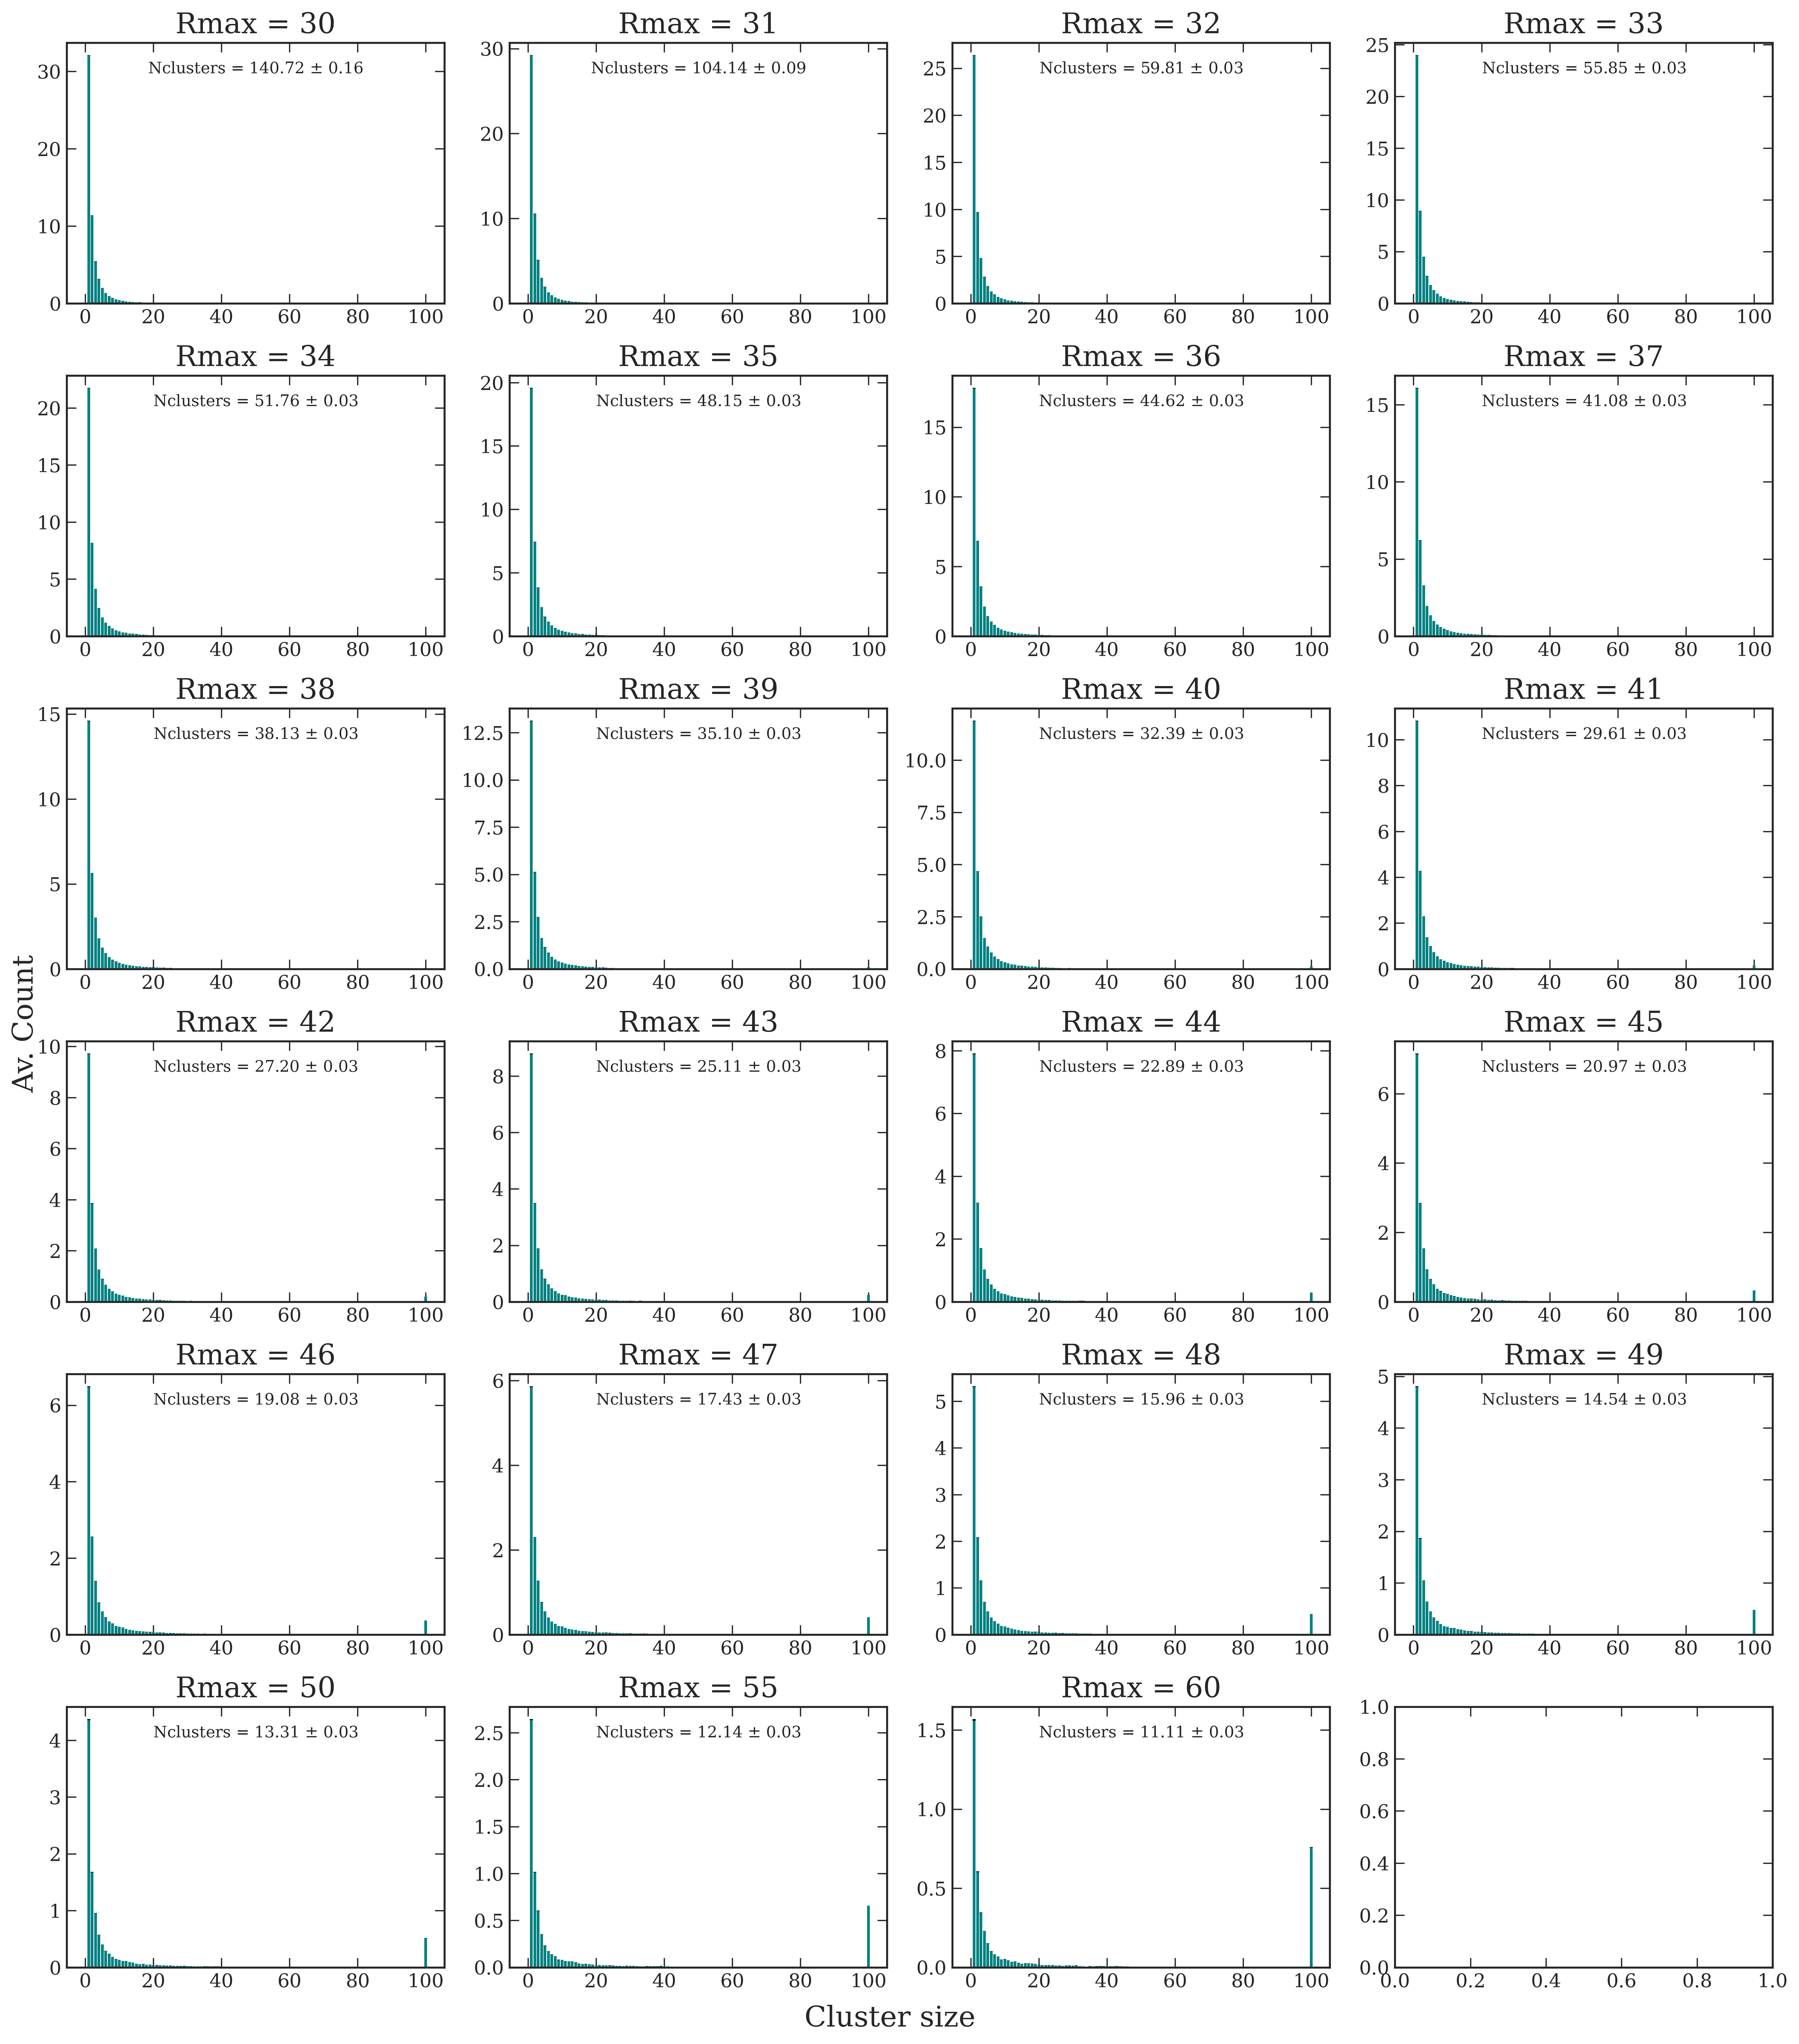

In [245]:
ncols = 4
rm_res = rm_list[2:25]
nrows = int(np.ceil(len(rm_res)/ncols))

fig, ax = plt.subplots(ncols=ncols,nrows=nrows, figsize=(16, 3*nrows))
ax = ax.flatten()
for i, dist in enumerate(rm_res):
    idx = rm_list.index(dist)

    ax[i].bar(np.arange(Nclusters), cluster_arr_av[:,idx], yerr = cluster_arr_std[:,idx],)
    ax[i].set_title(f'Rmax = {dist}')

    
    ax[i].text(0.5, 0.9, f'Nclusters = {num_cluster_av[i]:.2f} $\pm$ {num_cluster_std[i]:.2f}', horizontalalignment='center', verticalalignment='center', transform=ax[i].transAxes)
  #  ax[i].set_xticks([0, 20, 40, 60, 80, 100], ['0', '20', '40', '60', '80', '100+'])
 #   ax[i].set_xlim(1.9,30)
  #  ax[i].set_ylim(0, 12)
fig.supxlabel('Cluster size')
fig.supylabel('Av. Count');

In [220]:
df = np.diff(num_cluster_av) / num_cluster_av[1:]
ddf = np.diff(np.diff(num_cluster_av))

In [ ]:
plt.plot(np.array(rm_list)[:-1]+0.5, df)

In [ ]:
plt.plot(np.array(rm_list)[1:-1]+1,ddf)

In [227]:
cluster_arr_av.shape

(101, 28)

In [228]:
Nclusters

101

In [238]:
cluster_arr_av[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [240]:
av_cluster_size.shape

(28,)

In [242]:
len(rm_list)

28

In [260]:
cluster_arr[1000:, 2:, :, :].sum(axis=1).mean(axis=(0,-1))

array([140.72168554, 104.13782478,  59.80696203,  55.84568621,
        51.75932712,  48.14881746,  44.61583944,  41.08361093,
        38.12958028,  35.09785143,  32.38715856,  29.60992672,
        27.1944537 ,  25.10168221,  22.88674217,  20.96127582,
        19.07028648,  17.42105263,  15.95244837,  14.53872418,
        13.30804464,  12.13632578,  11.10468021,   7.15572951,
         4.69487009,   2.33677548,   1.47460027,   1.17430047])

In [264]:
cluster_arr.shape

(1501, 101, 28, 8)

In [270]:
cluster_arr_av.shape

(101, 28)

(10.0, 60.0)

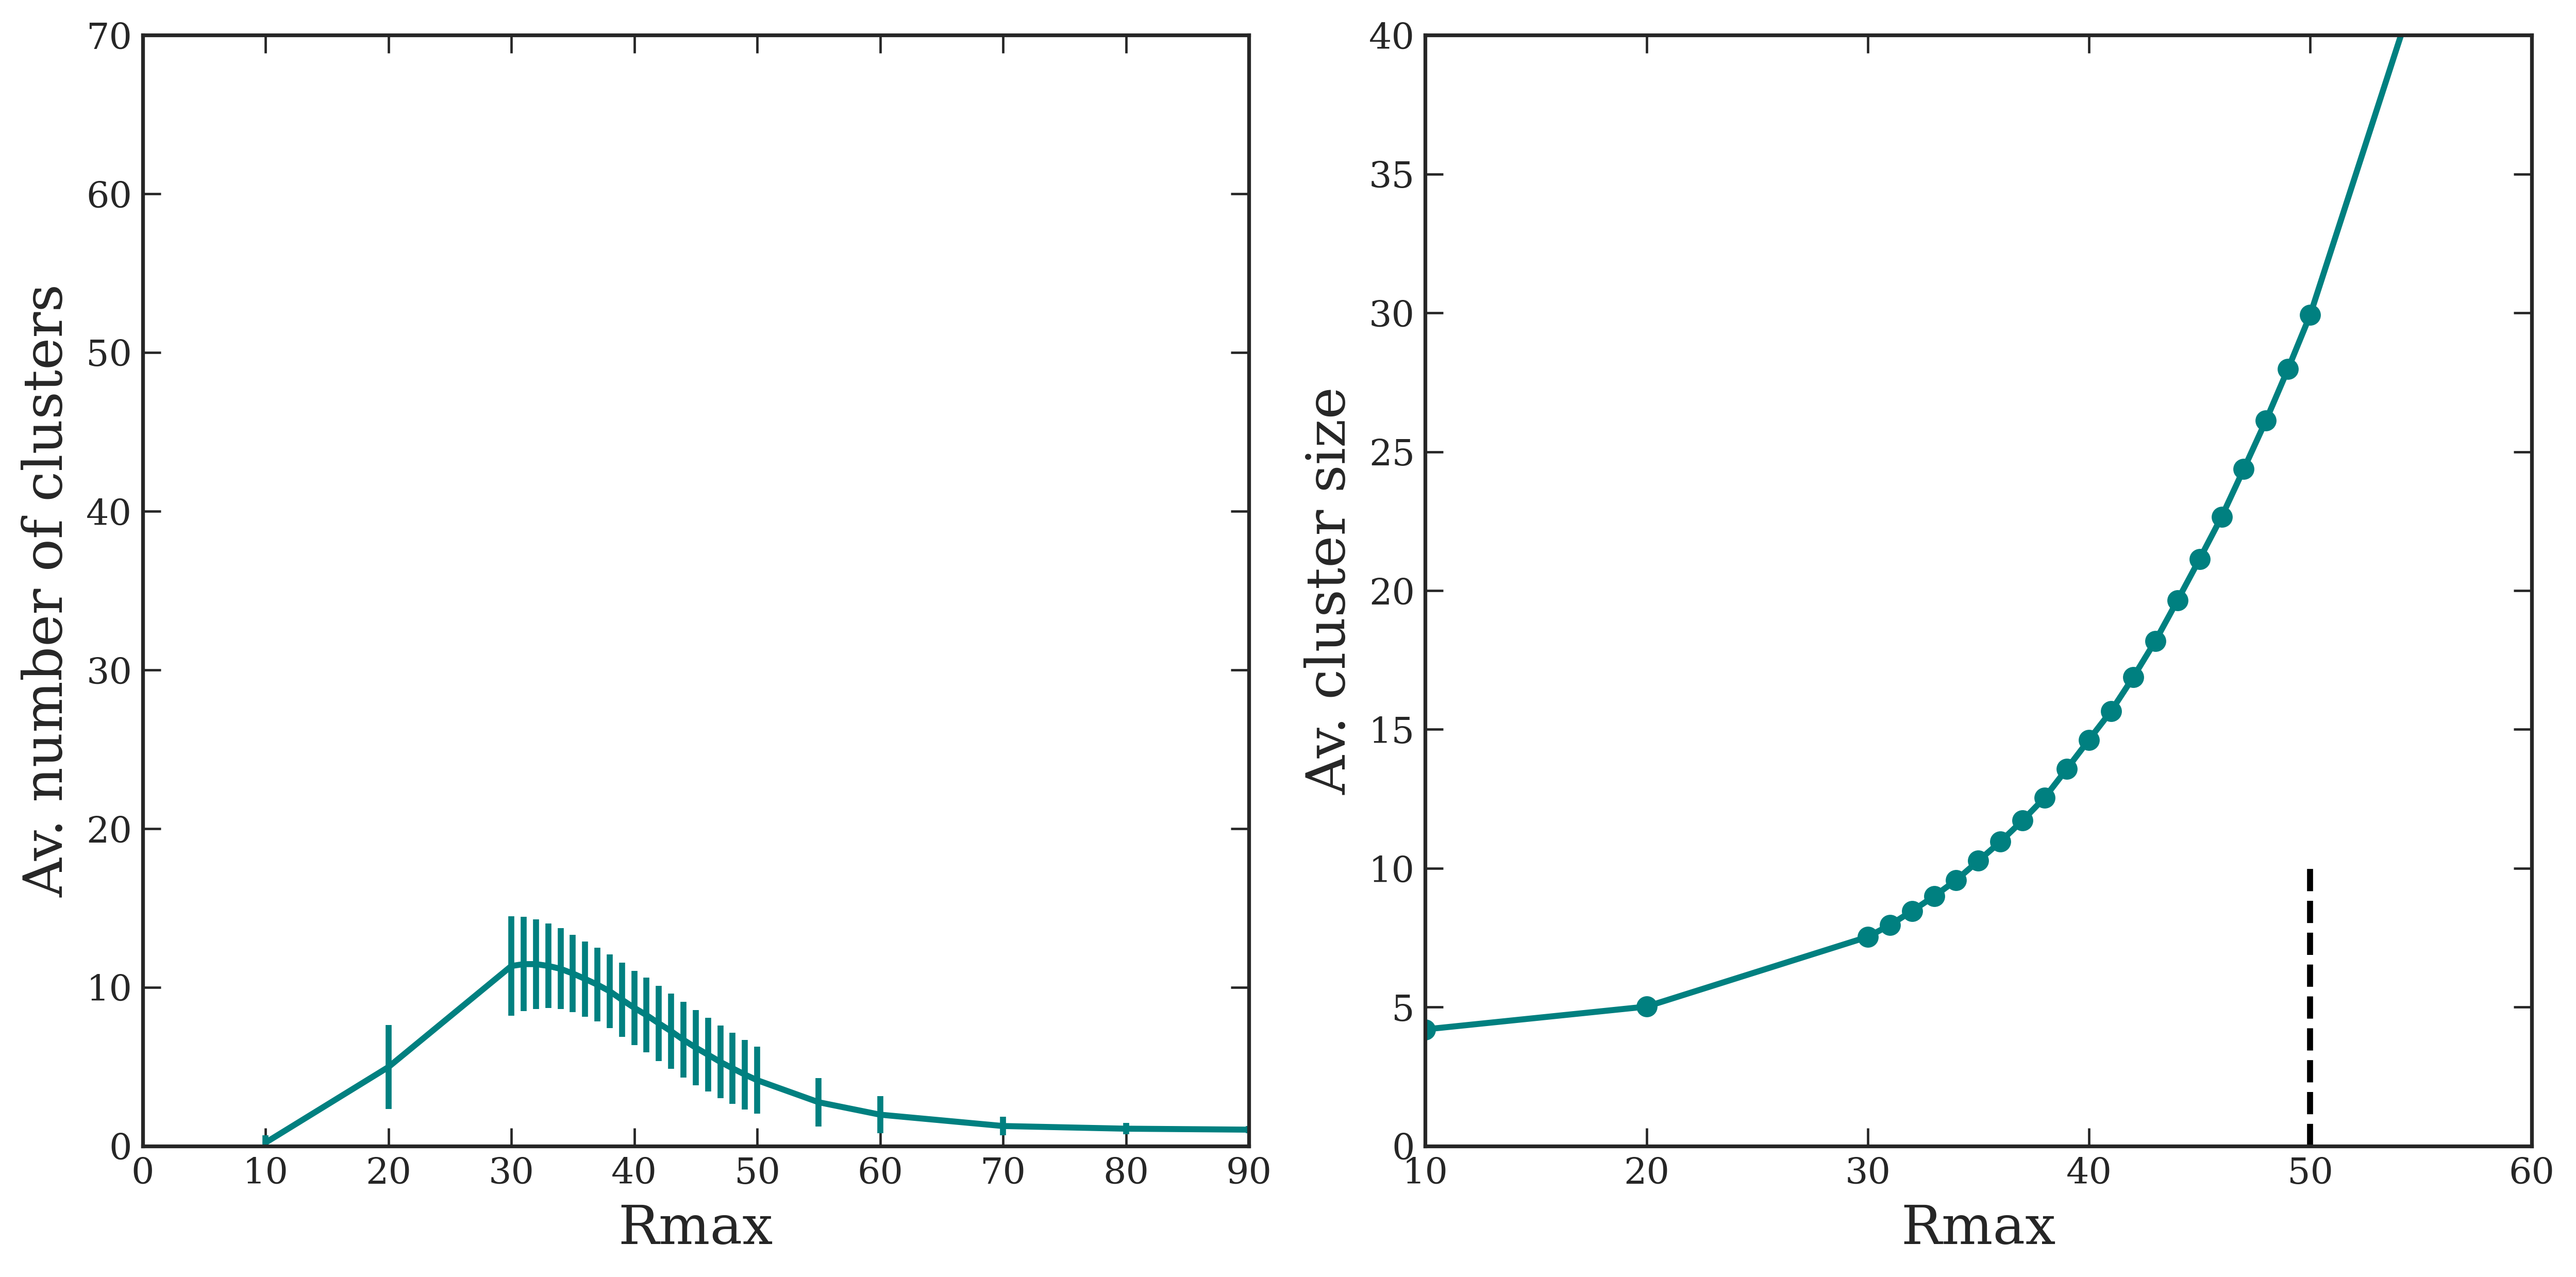

In [274]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))

ff = 1000
nc_min = 4
num_clusters = cluster_arr[ff:, nc_min:, :, :].sum(axis=1)
num_cluster_avs = np.mean(num_clusters, axis = (0,-1))
num_cluster_stds = np.std(num_clusters, axis = (0,-1))
av_cluster_size = np.sum(cluster_arr[ff:, nc_min:, :, :].mean(axis=(0,-1)) * np.arange(nc_min,Nclusters)[:, None], axis = 0) / np.sum(cluster_arr[ff:, nc_min:, :, :].mean(axis=(0,-1)), axis = 0)


ax[0].errorbar(rm_list, num_cluster_avs, num_cluster_stds)
ax[0].set_xlabel('Rmax')
ax[0].set_ylabel('Av. number of clusters')
ax[0].set_xlim(0,90)
ax[0].set_ylim(0, 70)

ax[1].plot(rm_list, av_cluster_size, 'o-')#np.diff(av_cluster_size))
ax[1].set_xlabel('Rmax')
ax[1].set_ylabel('Av. cluster size')
ax[1].vlines(50, 0, 10, linestyle='--', color='k')

ax[1].set_ylim(0, 40)
ax[1].set_xlim(10,60)

In [35]:
Nframes

1501

In [ ]:
for i, input in enumerate(d_cluster):
    Nsubdir = 1
    act = []
    act_dir = []
    for j, subdir in enumerate(os.listdir(input)):

        subdir_full = os.path.join(input, subdir)
        act.append(np.round(float(subdir_full.split('_')[-1]),4))
        act_dir.append(subdir_full)
        Nsubdir = max(Nsubdir, len(os.listdir(os.path.join(input, subdir))))

        if not os.path.isdir(self.output_paths[i]):
            os.makedirs(self.output_paths[i])

        if not os.path.isfile(os.path.join(self.output_paths[i], 'window_sizes.txt')):
            subsubdir = os.path.join(subdir_full, os.listdir(subdir_full)[0])
            dir_windows = os.path.join(subsubdir, 'window_sizes.txt')
            windows = np.loadtxt(dir_windows)   
            np.savetxt(os.path.join(self.output_paths[i], 'window_sizes.txt'), windows)
        else:
            windows = np.loadtxt(os.path.join(self.output_paths[i], 'window_sizes.txt'))
        self.window_sizes.append(windows)
            
        if not os.path.isfile(os.path.join(self.output_paths[i], 'kbins.txt')) or not os.path.isfile(os.path.join(self.output_paths[i], 'rad.txt')):
            subsubdir = os.path.join(subdir_full, os.listdir(subdir_full)[0])
            dir_kbins = os.path.join(subsubdir, 'kbins.txt')
            dir_rad = os.path.join(subsubdir, 'rad.txt')

            # save the kbins and rad if they exist
            if os.path.isfile(dir_kbins):
                kbins = np.loadtxt(dir_kbins)
                np.savetxt(os.path.join(self.output_paths[i], 'kbins.txt'), kbins)
            if os.path.isfile(dir_rad):
                rad = np.loadtxt(dir_rad)
                np.savetxt(os.path.join(self.output_paths[i], 'rad.txt'), rad)

    act, act_dir = zip(*sorted(zip(act, act_dir)))

    # save the activity list
    np.savetxt(os.path.join(self.output_paths[i], 'activity_list.txt'), act)

    self.act_list.append(act)
    self.act_dir_list.append(act_dir)
    self.Nexp.append(Nsubdir)

for i, output in enumerate(self.output_paths):
    if not os.path.exists(output):
        os.makedirs(output)
    if not os.path.exists(os.path.join(output, 'figs')):
        os.makedirs(os.path.join(output, 'figs'))   

    # load the convergence list if it exists
    try:
        self.conv_list.append(np.loadtxt(os.path.join(output, 'conv_list.txt')).astype(int))
    except:
        self.conv_list.append([0] * self.Nactivity[i])